ICPE 641 HW 2 - Matt Lee

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
diabetes = datasets.load_diabetes()
# load data into a Pandas DataFrame.
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [2]:
# Split the data into training and testing sets
X = df.drop('target', axis=1)  # Use all features except the target
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. a) Multiple Linear Regression

In [3]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Print the coefficients and intercept of the model
coefficient_dict = {}
for i, coef in enumerate(regr.coef_):
    feature_name = X.columns[i]
    coefficient_dict[feature_name] = round(coef, 2)
    print(f"{feature_name}: {round(coef, 2)}")
print("Model intercept:", round(regr.intercept_, 2))

# Build the regression formula dynamically with estimated coefficients
regression_formula = f"target = {round(regr.intercept_, 2)}"
for feature_name, coef in coefficient_dict.items():
    sign = "+" if coef > 0 else ""
    regression_formula += f" {sign} {coef}*{feature_name}"

print("Multiple Linear Regression Formula:")
print(regression_formula)


age: 29.25
sex: -261.71
bmi: 546.3
bp: 388.4
s1: -901.96
s2: 506.76
s3: 121.15
s4: 288.04
s5: 659.27
s6: 41.38
Model intercept: 151.01
Multiple Linear Regression Formula:
target = 151.01 + 29.25*age  -261.71*sex + 546.3*bmi + 388.4*bp  -901.96*s1 + 506.76*s2 + 121.15*s3 + 288.04*s4 + 659.27*s5 + 41.38*s6


In [4]:
x_pred = regr.predict(X_test)
print("R^2 Score:", r2_score(y_test, x_pred))

R^2 Score: 0.4772897164322617


In [5]:
# Calculate adjusted R-squared
n = len(X_test)  # number of observations
p = X_test.shape[1]  # number of predictors
r2 = r2_score(y_test, x_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2 Score: {adjusted_r2}")
print(f"Mean Squared Error: {mean_squared_error(y_test, x_pred)}")

Adjusted R^2 Score: 0.43444461122179134
Mean Squared Error: 2821.7509810013107


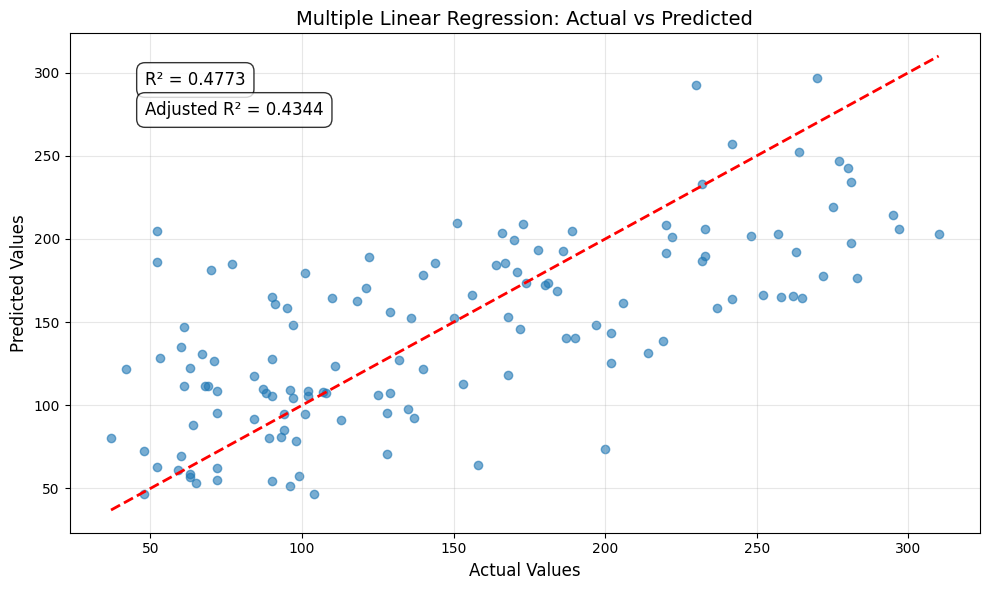

In [6]:
# Plot the actual vs predicted values for the multiple linear regression model
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test,x_pred, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Multiple Linear Regression: Actual vs Predicted', fontsize=14)

plt.grid(True, alpha=0.3)
plt.figtext(0.15, 0.85, f'R² = {r2:.4f}', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))
plt.figtext(0.15, 0.80, f'Adjusted R² = {adjusted_r2:.4f}', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))
plt.tight_layout()

1. b) Ridge Regression

In [7]:
from sklearn.linear_model import RidgeCV,Ridge

# Define a range of alpha values to try
alphas = np.logspace(-3, 3, 100)

# Initialize Ridge regression with cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the Ridge regression model
ridge_cv.fit(X_train, y_train)

# Create Ridge model with the best alpha from CV
ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(X_train, y_train)

# Get predictions for test data with the best model
y_pred_ridge = ridge_cv.predict(X_test)

# Get the best alpha value
best_alpha = ridge_cv.alpha_

print("Best alpha:", best_alpha)

# Evaluate the model on the test set
test_score = ridge_cv.score(X_test, y_test)
print("R^2 score on test set:", test_score)


Best alpha: 0.0030538555088334154
R^2 score on test set: 0.47763641425954373


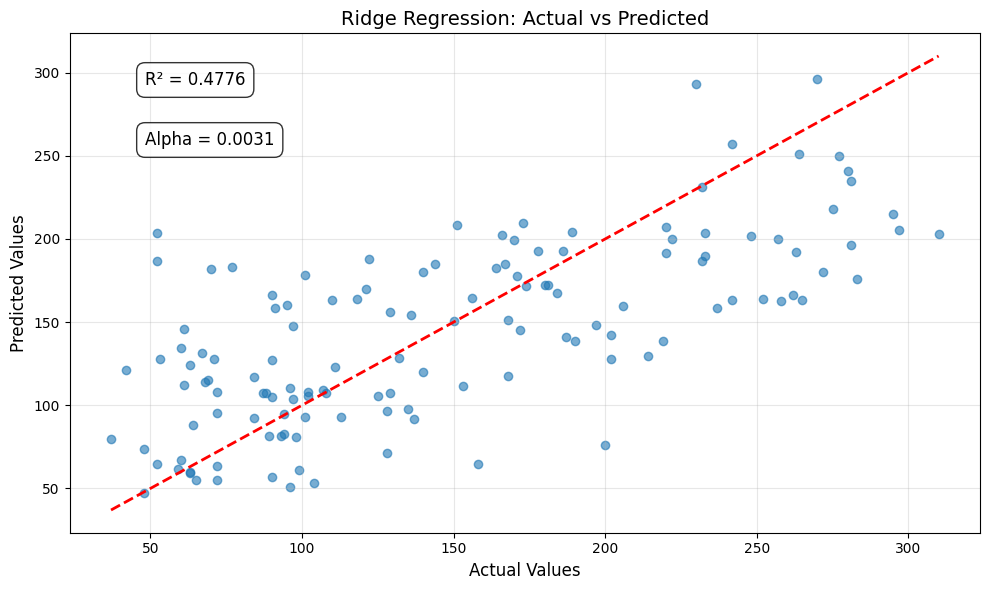

In [8]:
# Plot the actual vs predicted values for the Ridge regression model
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Ridge Regression: Actual vs Predicted', fontsize=14)

# Calculate adjusted R-squared for Ridge
n = len(X_test)
p = X_test.shape[1]
ridge_r2 = test_score

plt.grid(True, alpha=0.3)
plt.figtext(0.15, 0.85, f'R² = {test_score:.4f}', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))
plt.figtext(0.15, 0.75, f'Alpha = {best_alpha:.4f}', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))
plt.tight_layout()